In [66]:
import pandas as pd
import numpy as np
import math 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from itertools import combinations

from IPython.display import display, HTML

custom_styling = [
        {
            "selector": "th",
            "props": [
                ("background", "#00abe7"),
                ("color", "white"),
                ("font-family", "tahoma"),
                ("text-align", "center"),
                ("font-size", "15px"),
            ],
        },
        {
            "selector": "td",
            "props": [
                ("font-family", "tahoma"),
                ("color", "black"),
                ("text-align", "left"),
                ("font-size", "15px"),
            ],
        },
        {
            "selector": "tr:nth-of-type(odd)",
            "props": [
                ("background", "white"),
            ],
        },
        {"selector": "tr:nth-of-type(even)", "props": [("background", "#e8e6e6")]},
        {"selector": "tr:hover", "props": [("background-color", "#bfeaf9")]},
        {"selector": "td:hover", "props": [("background-color", "#7fd5f3")]},
    ]

def htmlIspis(podaci):
    display(HTML("<div style='overflow: auto;'>" + podaci.to_html() + "</div>"))

In [67]:
# ucitavanje podataka
podaci = pd.read_csv('tabela_automobila.csv')

# uklanjanje 30tak podataka koji imaju nepopunjenu kubikazu (elektricni automobili)
podaci.drop(podaci[podaci['gorivo'] == 'Električni pogon'].index, inplace = True)

# uklanjanje verovatno neispravnih redova sa cenom manjom od 200
podaci.drop(podaci[podaci.cena < 200].index, inplace=True)

htmlIspis(podaci.head(20))
htmlIspis(podaci.dtypes.to_frame())

,id,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga_motora,menjac,broj_vrata,boja,ostecenje,klima,lokacija,cena,url
0,1,Polovno vozilo,Nissan,Note,2006,174000,Hečbek,Benzin,1386,65,Manuelni 5 brzina,4/5 vrata,Siva,Nije oštećen,Manuelna klima,Kanjiža,3100,https://www.polovniautomobili.com/auto-oglasi/20063954/nissan-note-chful?attp=p1_pv0_pc1_pl1_plv0
1,2,Polovno vozilo,BMW,520,2007,185000,Limuzina,Dizel,1995,120,Manuelni 6 brzina,4/5 vrata,Plava,Nije oštećen,Automatska klima,Leskovac,6990,https://www.polovniautomobili.com/auto-oglasi/19849363/bmw-520-d?attp=p1_pv0_pc1_pl1_plv0
2,3,Polovno vozilo,Volkswagen,Passat B7,2013,213473,Karavan,Dizel,1598,77,Manuelni 6 brzina,4/5 vrata,Smeđa,Nije oštećen,Automatska klima,Batajnica,8650,https://www.polovniautomobili.com/auto-oglasi/20433917/volkswagen-passat-b7-16-tdi-p-anorama?attp=p1_pv0_pc1_pl1_plv0
3,4,Polovno vozilo,Volkswagen,Polo,2013,182306,Hečbek,Dizel,1199,55,Manuelni 5 brzina,4/5 vrata,Bela,Nije oštećen,Manuelna klima,Batajnica,5450,https://www.polovniautomobili.com/auto-oglasi/20428982/volkswagen-polo-12-tdi-bluemotion?attp=p3_pv0_pc1_pl1_plv0
4,5,Polovno vozilo,Škoda,Octavia,2013,238000,Limuzina,Dizel,1598,77,Automatski / poluautomatski,4/5 vrata,Crna,Nije oštećen,Automatska klima,Valjevo,11490,https://www.polovniautomobili.com/auto-oglasi/20453530/skoda-octavia-16tdidsgsavrsen?attp=p1_pv0_pc1_pl1_plv0
5,6,Polovno vozilo,BMW,520,2011,221935,Karavan,Dizel,1995,135,Automatski / poluautomatski,4/5 vrata,Crna,Nije oštećen,Automatska klima,Pančevo,12599,https://www.polovniautomobili.com/auto-oglasi/20113608/bmw-520-d-f11-autoomatic-nov?attp=p1_pv0_pc1_pl1_plv0
6,8,Polovno vozilo,Audi,A4,2015,220000,Limuzina,Dizel,1968,110,Manuelni 6 brzina,4/5 vrata,Crna,Nije oštećen,Automatska klima,Kragujevac,16200,https://www.polovniautomobili.com/auto-oglasi/20215227/audi-a4-20-tdi?attp=p1_pv0_pc1_pl1_plv0
7,10,Polovno vozilo,Volkswagen,Golf 4,2000,382669,Hečbek,Dizel,1896,85,Manuelni 6 brzina,4/5 vrata,Siva,Nije oštećen,Automatska klima,Laćarak,2400,https://www.polovniautomobili.com/auto-oglasi/20430637/volkswagen-golf-4-19-tdi?attp=p1_pv0_pc1_pl1_plv0
8,11,Polovno vozilo,MINI,Cooper S,2007,201000,Hečbek,Benzin,1598,125,Manuelni 6 brzina,2/3 vrata,Plava,Nije oštećen,Automatska klima,Vrčin,4600,https://www.polovniautomobili.com/auto-oglasi/20453708/mini-cooper-s-full?attp=p1_pv0_pc1_pl1_plv0
9,12,Polovno vozilo,Volkswagen,Tiguan,2011,154000,Džip/SUV,Dizel,1968,103,Manuelni 6 brzina,4/5 vrata,Crna,Nije oštećen,Automatska klima,Leskovac,10490,https://www.polovniautomobili.com/auto-oglasi/19925301/volkswagen-tiguan-20-tdi-4-motion?attp=p1_pv0_pc1_pl1_plv0


,0
id,int64
stanje,object
marka,object
model,object
godiste,int64
kilometraza,int64
karoserija,object
gorivo,object
kubikaza,int64
snaga_motora,int64


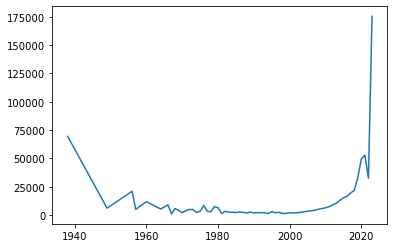

In [124]:
plt.plot(podaci.groupby('godiste')['cena'].mean())

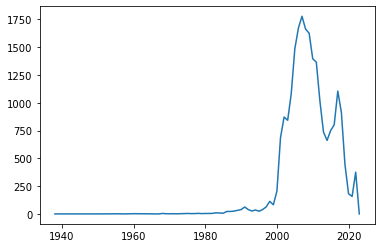

In [125]:
plt.plot(podaci.groupby('godiste').size())

In [203]:
print(len(podaci))
podaci = podaci[(podaci['godiste'] >= 1985) & (podaci['godiste'] <= 2022)]
print(len(podaci))

22353
22353


In [64]:
podaci.columns

Index(['id', 'stanje', 'marka', 'model', 'godiste', 'kilometraza',
       'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac',
       'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija', 'cena', 'url',
       'opseg_cena'],
      dtype='object')

In [68]:
# dodavanje opsega cena
opseg_cena = []
for cena in podaci['cena']:
    if cena < 2000:
        opseg = 1
    elif  2000 <= cena <= 4999:
        opseg = 2
    elif  5000 <= cena <= 9999: 
        opseg = 3
    elif 10000 <= cena <= 14999:
        opseg = 4
    elif 15000 <= cena <= 19999:
        opseg = 5
    elif 20000 <= cena <= 24999:
        opseg = 6
    elif 25000 <= cena <= 29999:
        opseg = 7
    else:
        opseg = 8
    opseg_cena.append(opseg)

podaci['opseg_cena'] = opseg_cena
print(podaci.groupby('opseg_cena').size())

opseg_cena
1    2802
2    8470
3    5582
4    2244
5    1284
6     602
7     455
8    1008
dtype: int64


In [69]:
# Beograd i BEOGRAD je ista vrednost => resenje sve prebaciti u uppercase
for kolona in podaci.columns:
    if(podaci[kolona].dtype == 'object' and kolona != 'url'):
        podaci[kolona] = podaci[kolona].str.upper() 

htmlIspis(podaci.head(20))

,id,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga_motora,menjac,broj_vrata,boja,ostecenje,klima,lokacija,cena,url,opseg_cena
0,1,POLOVNO VOZILO,NISSAN,NOTE,2006,174000,HEČBEK,BENZIN,1386,65,MANUELNI 5 BRZINA,4/5 VRATA,SIVA,NIJE OŠTEĆEN,MANUELNA KLIMA,KANJIŽA,3100,https://www.polovniautomobili.com/auto-oglasi/20063954/nissan-note-chful?attp=p1_pv0_pc1_pl1_plv0,2
1,2,POLOVNO VOZILO,BMW,520,2007,185000,LIMUZINA,DIZEL,1995,120,MANUELNI 6 BRZINA,4/5 VRATA,PLAVA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,LESKOVAC,6990,https://www.polovniautomobili.com/auto-oglasi/19849363/bmw-520-d?attp=p1_pv0_pc1_pl1_plv0,3
2,3,POLOVNO VOZILO,VOLKSWAGEN,PASSAT B7,2013,213473,KARAVAN,DIZEL,1598,77,MANUELNI 6 BRZINA,4/5 VRATA,SMEĐA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,BATAJNICA,8650,https://www.polovniautomobili.com/auto-oglasi/20433917/volkswagen-passat-b7-16-tdi-p-anorama?attp=p1_pv0_pc1_pl1_plv0,3
3,4,POLOVNO VOZILO,VOLKSWAGEN,POLO,2013,182306,HEČBEK,DIZEL,1199,55,MANUELNI 5 BRZINA,4/5 VRATA,BELA,NIJE OŠTEĆEN,MANUELNA KLIMA,BATAJNICA,5450,https://www.polovniautomobili.com/auto-oglasi/20428982/volkswagen-polo-12-tdi-bluemotion?attp=p3_pv0_pc1_pl1_plv0,3
4,5,POLOVNO VOZILO,ŠKODA,OCTAVIA,2013,238000,LIMUZINA,DIZEL,1598,77,AUTOMATSKI / POLUAUTOMATSKI,4/5 VRATA,CRNA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,VALJEVO,11490,https://www.polovniautomobili.com/auto-oglasi/20453530/skoda-octavia-16tdidsgsavrsen?attp=p1_pv0_pc1_pl1_plv0,4
5,6,POLOVNO VOZILO,BMW,520,2011,221935,KARAVAN,DIZEL,1995,135,AUTOMATSKI / POLUAUTOMATSKI,4/5 VRATA,CRNA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,PANČEVO,12599,https://www.polovniautomobili.com/auto-oglasi/20113608/bmw-520-d-f11-autoomatic-nov?attp=p1_pv0_pc1_pl1_plv0,4
6,8,POLOVNO VOZILO,AUDI,A4,2015,220000,LIMUZINA,DIZEL,1968,110,MANUELNI 6 BRZINA,4/5 VRATA,CRNA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,KRAGUJEVAC,16200,https://www.polovniautomobili.com/auto-oglasi/20215227/audi-a4-20-tdi?attp=p1_pv0_pc1_pl1_plv0,5
7,10,POLOVNO VOZILO,VOLKSWAGEN,GOLF 4,2000,382669,HEČBEK,DIZEL,1896,85,MANUELNI 6 BRZINA,4/5 VRATA,SIVA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,LAĆARAK,2400,https://www.polovniautomobili.com/auto-oglasi/20430637/volkswagen-golf-4-19-tdi?attp=p1_pv0_pc1_pl1_plv0,2
8,11,POLOVNO VOZILO,MINI,COOPER S,2007,201000,HEČBEK,BENZIN,1598,125,MANUELNI 6 BRZINA,2/3 VRATA,PLAVA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,VRČIN,4600,https://www.polovniautomobili.com/auto-oglasi/20453708/mini-cooper-s-full?attp=p1_pv0_pc1_pl1_plv0,2
9,12,POLOVNO VOZILO,VOLKSWAGEN,TIGUAN,2011,154000,DŽIP/SUV,DIZEL,1968,103,MANUELNI 6 BRZINA,4/5 VRATA,CRNA,NIJE OŠTEĆEN,AUTOMATSKA KLIMA,LESKOVAC,10490,https://www.polovniautomobili.com/auto-oglasi/19925301/volkswagen-tiguan-20-tdi-4-motion?attp=p1_pv0_pc1_pl1_plv0,4


In [5]:
# enkodovanje podataka
# label_enc = LabelEncoder()

# podaci['marka'] = label_enc.fit_transform(podaci['marka'])
# podaci['stanje'] = label_enc.fit_transform(podaci['stanje'])
# podaci['karoserija'] = label_enc.fit_transform(podaci['karoserija'])
# podaci['gorivo'] = label_enc.fit_transform(podaci['gorivo'])
# podaci['menjac'] = label_enc.fit_transform(podaci['menjac'])
# podaci['broj_vrata'] = label_enc.fit_transform(podaci['broj_vrata'])
# podaci['ostecenje'] = label_enc.fit_transform(podaci['ostecenje'])
# podaci['klima'] = label_enc.fit_transform(podaci['klima'])
# podaci['model'] = label_enc.fit_transform(podaci['model'])
# podaci['boja'] = label_enc.fit_transform(podaci['boja'])
# podaci['lokacija'] = label_enc.fit_transform(podaci['lokacija'])
# podaci['opseg_cena'] = label_enc.fit_transform(podaci['opseg_cena'])

# htmlIspis(podaci.head(20))
# htmlIspis(podaci.dtypes.to_frame())

#le_dict = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
print(label_enc.classes_)

,id,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga_motora,menjac,broj_vrata,boja,ostecenje,klima,lokacija,cena,url,opseg_cena
0,1,1,37,547,2006,174000,1,0,1386,65,2,1,11,0,1,243,3100,https://www.polovniautomobili.com/auto-oglasi/20063954/nissan-note-chful?attp=p1_pv0_pc1_pl1_plv0,1
1,2,1,4,92,2007,185000,5,3,1995,120,3,1,10,0,0,319,6990,https://www.polovniautomobili.com/auto-oglasi/19849363/bmw-520-d?attp=p1_pv0_pc1_pl1_plv0,2
2,3,1,55,573,2013,213473,3,3,1598,77,3,1,12,0,0,40,8650,https://www.polovniautomobili.com/auto-oglasi/20433917/volkswagen-passat-b7-16-tdi-p-anorama?attp=p1_pv0_pc1_pl1_plv0,2
3,4,1,55,585,2013,182306,1,3,1199,55,2,1,0,0,1,40,5450,https://www.polovniautomobili.com/auto-oglasi/20428982/volkswagen-polo-12-tdi-bluemotion?attp=p3_pv0_pc1_pl1_plv0,2
4,5,1,59,550,2013,238000,5,3,1598,77,0,1,4,0,0,625,11490,https://www.polovniautomobili.com/auto-oglasi/20453530/skoda-octavia-16tdidsgsavrsen?attp=p1_pv0_pc1_pl1_plv0,3
5,6,1,4,92,2011,221935,3,3,1995,135,0,1,4,0,0,452,12599,https://www.polovniautomobili.com/auto-oglasi/20113608/bmw-520-d-f11-autoomatic-nov?attp=p1_pv0_pc1_pl1_plv0,3
6,8,1,3,144,2015,220000,5,3,1968,110,3,1,4,0,0,278,16200,https://www.polovniautomobili.com/auto-oglasi/20215227/audi-a4-20-tdi?attp=p1_pv0_pc1_pl1_plv0,4
7,10,1,55,415,2000,382669,1,3,1896,85,3,1,11,0,0,313,2400,https://www.polovniautomobili.com/auto-oglasi/20430637/volkswagen-golf-4-19-tdi?attp=p1_pv0_pc1_pl1_plv0,1
8,11,1,35,280,2007,201000,1,0,1598,125,3,0,10,0,0,674,4600,https://www.polovniautomobili.com/auto-oglasi/20453708/mini-cooper-s-full?attp=p1_pv0_pc1_pl1_plv0,1
9,12,1,55,733,2011,154000,0,3,1968,103,3,1,4,0,0,319,10490,https://www.polovniautomobili.com/auto-oglasi/19925301/volkswagen-tiguan-20-tdi-4-motion?attp=p1_pv0_pc1_pl1_plv0,3


,0
id,int64
stanje,int32
marka,int32
model,int32
godiste,int64
kilometraza,int64
karoserija,int32
gorivo,int32
kubikaza,int64
snaga_motora,int64


[1 2 3 4 5 6 7 8]


In [71]:
enkoder = OrdinalEncoder()
kolone_za_enkodovanje = ['marka', 'stanje', 'karoserija', 'gorivo', 'menjac', 'broj_vrata', 'ostecenje', 'klima', 'model', 'boja', 'lokacija']
podaci[kolone_za_enkodovanje] = enkoder.fit_transform(podaci[kolone_za_enkodovanje])

htmlIspis(podaci.head(20))
htmlIspis(podaci.dtypes.to_frame())

,id,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga_motora,menjac,broj_vrata,boja,ostecenje,klima,lokacija,cena,url,opseg_cena
0,1,1.0,37.0,547.0,2006,174000,1.0,0.0,1386,65,2.0,1.0,11.0,0.0,1.0,243.0,3100,https://www.polovniautomobili.com/auto-oglasi/20063954/nissan-note-chful?attp=p1_pv0_pc1_pl1_plv0,2
1,2,1.0,4.0,92.0,2007,185000,5.0,3.0,1995,120,3.0,1.0,10.0,0.0,0.0,319.0,6990,https://www.polovniautomobili.com/auto-oglasi/19849363/bmw-520-d?attp=p1_pv0_pc1_pl1_plv0,3
2,3,1.0,55.0,573.0,2013,213473,3.0,3.0,1598,77,3.0,1.0,12.0,0.0,0.0,40.0,8650,https://www.polovniautomobili.com/auto-oglasi/20433917/volkswagen-passat-b7-16-tdi-p-anorama?attp=p1_pv0_pc1_pl1_plv0,3
3,4,1.0,55.0,585.0,2013,182306,1.0,3.0,1199,55,2.0,1.0,0.0,0.0,1.0,40.0,5450,https://www.polovniautomobili.com/auto-oglasi/20428982/volkswagen-polo-12-tdi-bluemotion?attp=p3_pv0_pc1_pl1_plv0,3
4,5,1.0,59.0,550.0,2013,238000,5.0,3.0,1598,77,0.0,1.0,4.0,0.0,0.0,625.0,11490,https://www.polovniautomobili.com/auto-oglasi/20453530/skoda-octavia-16tdidsgsavrsen?attp=p1_pv0_pc1_pl1_plv0,4
5,6,1.0,4.0,92.0,2011,221935,3.0,3.0,1995,135,0.0,1.0,4.0,0.0,0.0,452.0,12599,https://www.polovniautomobili.com/auto-oglasi/20113608/bmw-520-d-f11-autoomatic-nov?attp=p1_pv0_pc1_pl1_plv0,4
6,8,1.0,3.0,144.0,2015,220000,5.0,3.0,1968,110,3.0,1.0,4.0,0.0,0.0,278.0,16200,https://www.polovniautomobili.com/auto-oglasi/20215227/audi-a4-20-tdi?attp=p1_pv0_pc1_pl1_plv0,5
7,10,1.0,55.0,415.0,2000,382669,1.0,3.0,1896,85,3.0,1.0,11.0,0.0,0.0,313.0,2400,https://www.polovniautomobili.com/auto-oglasi/20430637/volkswagen-golf-4-19-tdi?attp=p1_pv0_pc1_pl1_plv0,2
8,11,1.0,35.0,280.0,2007,201000,1.0,0.0,1598,125,3.0,0.0,10.0,0.0,0.0,674.0,4600,https://www.polovniautomobili.com/auto-oglasi/20453708/mini-cooper-s-full?attp=p1_pv0_pc1_pl1_plv0,2
9,12,1.0,55.0,733.0,2011,154000,0.0,3.0,1968,103,3.0,1.0,4.0,0.0,0.0,319.0,10490,https://www.polovniautomobili.com/auto-oglasi/19925301/volkswagen-tiguan-20-tdi-4-motion?attp=p1_pv0_pc1_pl1_plv0,4


,0
id,int64
stanje,float64
marka,float64
model,float64
godiste,int64
kilometraza,int64
karoserija,float64
gorivo,float64
kubikaza,int64
snaga_motora,int64


In [75]:
print(podaci[podaci['id'] == 9773])  

        id  stanje  marka  model  godiste  kilometraza  karoserija  gorivo  \
8864  9773     1.0   26.0  755.0     2020        29000         0.0     0.0   

      kubikaza  snaga_motora  menjac  broj_vrata  boja  ostecenje  klima  \
8864      4398           478     0.0         1.0  11.0        0.0    0.0   

      lokacija    cena                                                url  \
8864      65.0  329000  https://www.polovniautomobili.com/auto-oglasi/...   

      opseg_cena  
8864           8  


In [11]:
matrica_korelacije = podaci.corr(method='pearson')
htmlIspis(matrica_korelacije['opseg_cena'].sort_values().to_frame())

matrica_korelacije = podaci.corr(method='kendall')
htmlIspis(matrica_korelacije['opseg_cena'].sort_values().to_frame())

matrica_korelacije = podaci.corr(method='spearman')
htmlIspis(matrica_korelacije['opseg_cena'].sort_values().to_frame())

htmlIspis(matrica_korelacije)

# najbitnije odlike (3  metoda): kilometraza, klima, godiste, snaga_motora
# bitne odlike (2 metoda): kubikaza
# moguce znacajne odlike (1 metod): menjac, stanje, gorivo, broj_vrata
# nebitna odlika: marka, karoserija, ostecenje, lokacija, model

,opseg_cena
kilometraza,-0.437851
menjac,-0.405621
klima,-0.403124
stanje,-0.258155
id,-0.171018
boja,-0.159760
karoserija,-0.104848
marka,-0.102649
ostecenje,-0.096367
lokacija,-0.054748


,opseg_cena
klima,-0.403943
kilometraza,-0.266478
stanje,-0.169473
boja,-0.145935
id,-0.145494
karoserija,-0.138680
ostecenje,-0.114090
menjac,-0.107655
marka,-0.062932
lokacija,-0.030575


,opseg_cena
klima,-0.450973
kilometraza,-0.349189
id,-0.199104
stanje,-0.188340
boja,-0.182259
karoserija,-0.170957
menjac,-0.150622
ostecenje,-0.126995
marka,-0.083402
lokacija,-0.040632


,id,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga_motora,menjac,broj_vrata,boja,ostecenje,klima,lokacija,cena,opseg_cena
id,1.000000,0.133208,-0.021934,-0.016765,-0.246831,0.182925,0.093203,-0.031472,0.067871,-0.021551,-0.013695,-0.070769,0.042516,0.051839,0.083075,0.004716,-0.213056,-0.199104
stanje,0.133208,1.000000,0.022123,-0.060189,-0.207473,0.207716,0.091709,0.103391,0.074085,-0.035798,-0.010454,-0.037125,0.018271,0.014713,0.057831,0.008426,-0.181919,-0.188340
marka,-0.021934,0.022123,1.000000,0.379585,-0.011022,-0.027217,-0.039117,-0.054211,-0.221418,-0.240343,0.031480,0.002084,0.018896,0.008855,0.099106,-0.004039,-0.083412,-0.083402
model,-0.016765,-0.060189,0.379585,1.000000,0.044645,-0.050838,-0.142714,-0.021308,-0.031597,-0.003717,-0.034253,0.044319,-0.018492,0.000749,0.013752,-0.019019,0.058018,0.061975
godiste,-0.246831,-0.207473,-0.011022,0.044645,1.000000,-0.483192,-0.185209,0.163515,-0.048661,0.256821,-0.079180,0.210323,-0.228503,-0.089923,-0.312965,-0.040423,0.850515,0.819874
kilometraza,0.182925,0.207716,-0.027217,-0.050838,-0.483192,1.000000,0.225069,0.245435,0.310745,0.110473,0.087006,0.050160,0.114105,0.053194,-0.043308,0.043215,-0.351055,-0.349189
karoserija,0.093203,0.091709,-0.039117,-0.142714,-0.185209,0.225069,1.000000,0.084749,0.138152,0.064307,0.056784,0.081112,0.078780,0.016796,-0.036716,0.022021,-0.173665,-0.170957
gorivo,-0.031472,0.103391,-0.054211,-0.021308,0.163515,0.245435,0.084749,1.000000,0.453110,0.275323,0.037235,0.259274,-0.004691,-0.002132,-0.297444,0.022494,0.244687,0.223522
kubikaza,0.067871,0.074085,-0.221418,-0.031597,-0.048661,0.310745,0.138152,0.453110,1.000000,0.779570,-0.082143,0.206954,0.050115,0.016806,-0.422834,-0.003031,0.272501,0.263900
snaga_motora,-0.021551,-0.035798,-0.240343,-0.003717,0.256821,0.110473,0.064307,0.275323,0.779570,1.000000,-0.065081,0.223961,-0.005902,-0.025833,-0.585368,-0.022807,0.549761,0.536518


In [61]:
def lrModel(listaKolona = ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'ostecenje', 'klima', 'lokacija'], ispis = False, lr = linear_model.Ridge(alpha = 10)):
    X = podaci[listaKolona] # probamo razlicite kombinacije ulaznih odlika
    y = podaci['cena']
    
    ss = StandardScaler()
    X_skalirano = ss.fit_transform(X)
    
    X_trening, X_test, y_trening, y_test = train_test_split(X_skalirano, y, test_size = 0.2, random_state = 42)
    
    poli = PolynomialFeatures(degree = 3)
    X_trening = poli.fit_transform(X_trening)
    
    X_test = poli.fit_transform(X_test)    
    lr.fit(X_trening, y_trening)    
    
#     lr = make_pipeline(PolynomialFeatures(2), lr)
#     lr.fit(X_trening, y_trening) 
    
    y_pred = lr.predict(X_test)

    if ispis == True:
        lista_imena_ulaznih_kolona = poli.get_feature_names(X.columns)
        lista_tezina = lr.coef_
        
        tezine_kolona = list(zip(lista_imena_ulaznih_kolona, lista_tezina))
        tezine_kolona_DF = pd.DataFrame(tezine_kolona, columns=['Odlika','Tezina'])
        
        htmlIspis(tezine_kolona_DF.iloc[tezine_kolona_DF['Tezina'].abs().argsort()])
        
        print('Koeficijent determinacije (trening podaci): ', lr.score(X_trening, y_trening))
        print('Koeficijent determinacije (test podaci): ', lr.score(X_test, y_test), end='\n\n')
    
    return lr

In [62]:
# lrModel(lr = LinearRegression(), ispis = True)
# lrModel(lr = linear_model.Lasso(alpha = 10), ispis = True)
lrModel(lr = linear_model.Ridge(alpha = 1000), ispis = True)
# lrModel(lr = linear_model.ElasticNet(alpha = 0.5), ispis = True)

,Odlika,Tezina
0,1,0.000000
538,karoserija kubikaza lokacija,0.069449
1,stanje,0.071308
420,godiste karoserija boja,0.108642
20,stanje karoserija,-0.253985
212,stanje menjac ostecenje,0.314449
193,stanje gorivo boja,-0.382339
216,stanje boja ostecenje,0.539476
15,stanje^2,-0.576895
454,godiste ostecenje^2,0.578419


Koeficijent determinacije (trening podaci):  0.9232657387014733
Koeficijent determinacije (test podaci):  0.8717290694020698



Ridge(alpha=1000)

In [74]:
def ispitivanje_parametara(model):
    ulazniPodaci = ['stanje', 'marka', 'model', 'godiste', 'kilometraza',
           'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac',
           'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']

    maksRez = -1;
    brojKolona = len(ulazniPodaci)
    dobitneKolone = []
    brojKolona = len(ulazniPodaci)

    for i in range(2, brojKolona + 1):
        print('Obradjuje se: ', i)
        kombinacije = list(combinations(ulazniPodaci, i))
        for kolone in kombinacije:
            rez = lrModel(listaKolona = list(kolone), lr = model)
            if(rez > maksRez):
                print('Trenutni najbolji rezultat:', rez)
                print('Trenutni najbolji izbor kolona', list(kolone))
                maksRez = rez
                dobitneKolone = kolone

    print('Najbolji rezultat: ', maksRez)
    print('Kolone: ', dobitneKolone)
    return maksRez, dobitneKolone

Obradjuje se:  2
Trenutni najbolji rezultat: 0.05490224186492032
Trenutni najbolji izbor kolona ['stanje', 'marka']
Trenutni najbolji rezultat: 0.3120397425052618
Trenutni najbolji izbor kolona ['stanje', 'godiste']
Trenutni najbolji rezultat: 0.4608456841450579
Trenutni najbolji izbor kolona ['stanje', 'snaga_motora']
Trenutni najbolji rezultat: 0.46371481327285846
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5753029316372313
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5811454142532121
Trenutni najbolji izbor kolona ['kilometraza', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5846609419860844
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5854030877364853
Trenutni najbolji izbor kolona ['stanje', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6356643766268951
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 's

Trenutni najbolji rezultat: 0.6377668461602023
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6503578518494406
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  5
Trenutni najbolji rezultat: 0.6521308050130938
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.652195412175639
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.657458617791556
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  6
Trenutni najbolji rezultat: 0.6593407934038501
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6599158639813631
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menj

Trenutni najbolji rezultat: 0.6607954335112365
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6621820987009668
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  8
Trenutni najbolji rezultat: 0.6632058018416922
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6636408103625895
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  9
Trenutni najbolji rezultat: 0.6640031234289445
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6641004110884299
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'karose

Trenutni najbolji rezultat: 0.664410595022437
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6647131057368739
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  10
Trenutni najbolji rezultat: 0.664770851876989
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6650757836314748
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6651325474003572
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6654851096610

Obradjuje se:  11
Trenutni najbolji rezultat: 0.6658453074260986
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  12
Trenutni najbolji rezultat: 0.6658953111071617
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'klima']
Trenutni najbolji rezultat: 0.6659322980773604
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Trenutni najbolji rezultat: 0.6659871386490825
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'ostecenje', 'klima']
Obradjuje se:  13
Trenutni najbolji rezultat: 0.6660392243684848
Trenutni najbolji izbor kolona ['stanje', 'marka

Obradjuje se:  14
Trenutni najbolji rezultat: 0.6661023956261338
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima']
Trenutni najbolji rezultat: 0.6661202022022357
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'ostecenje', 'klima', 'lokacija']
Obradjuje se:  15
Trenutni najbolji rezultat: 0.6661601348753902
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']
Najbolji rezultat:  0.6661601348753902
Kolone:  ('stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija')
Obradjuje se:  2

Obradjuje se:  5
Trenutni najbolji rezultat: 0.6346135825053735
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  6
Trenutni najbolji rezultat: 0.6346135950561778
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  7
Trenutni najbolji rezultat: 0.6346135979079328
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  8
Obradjuje se:  9
Obradjuje se:  10
Obradjuje se:  11
Obradjuje se:  12
Obradjuje se:  13
Obradjuje se:  14
Obradjuje se:  15
Najbolji rezultat:  0.6346135979079328
Kolone:  ('stanje', 'marka', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac')
Obradjuje se:  2
Trenutni najbolji rezultat: -4.0283604274549134e-07
Trenutni najbolji izbor kolona ['stanje', 'marka']
Obradjuje se:  3
Obradjuje se:  4
Obradjuje se:  5
Obradjuje se:  6
Obradjuje se:  7
Obradjuje se:  8
Obradj

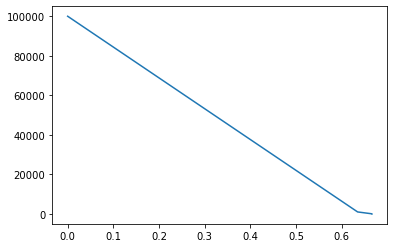

In [77]:
alfa_parametri = [0.1, 0.3, 0.5, 1, 2, 10, 100, 1000, 100000]
alfa_rezultati = []
for alfa in alfa_parametri:
    maks_rez, dobitne_kolone = ispitivanje_parametara(model = linear_model.Lasso(alpha = alfa))
    alfa_rezultati.append(maks_rez)

plt.plot(alfa_rezultati, alfa_parametri)

Obradjuje se:  2
Trenutni najbolji rezultat: 0.054902232241192506
Trenutni najbolji izbor kolona ['stanje', 'marka']
Trenutni najbolji rezultat: 0.3120397538349665
Trenutni najbolji izbor kolona ['stanje', 'godiste']
Trenutni najbolji rezultat: 0.4608457158246969
Trenutni najbolji izbor kolona ['stanje', 'snaga_motora']
Trenutni najbolji rezultat: 0.4637148614715325
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5753029753455579
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5811454373371757
Trenutni najbolji izbor kolona ['kilometraza', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5846609768453552
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5854031081354754
Trenutni najbolji izbor kolona ['stanje', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.635664404130085
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'sn

Trenutni najbolji rezultat: 0.6377669342282026
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6503579226271319
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  5
Trenutni najbolji rezultat: 0.6521308865206557
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.6521954651071672
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.6574587245951002
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  6
Trenutni najbolji rezultat: 0.6593409220311548
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6599159237622572
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'me

Trenutni najbolji rezultat: 0.660795653105148
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6621822504376209
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  8
Trenutni najbolji rezultat: 0.6632060492514379
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6636409375061849
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  9
Trenutni najbolji rezultat: 0.6640033431698769
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.664100707292683
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'karoseri

Trenutni najbolji rezultat: 0.6644109931595565
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6647128532113964
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  10
Trenutni najbolji rezultat: 0.6647714338045736
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6650757207778979
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6651327072293354
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.66548497809

Obradjuje se:  11
Trenutni najbolji rezultat: 0.6658457372187936
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  12
Trenutni najbolji rezultat: 0.665896005217357
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'klima']
Trenutni najbolji rezultat: 0.6659322587953009
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Trenutni najbolji rezultat: 0.6659869240533551
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'ostecenje', 'klima']
Obradjuje se:  13
Trenutni najbolji rezultat: 0.6660392600167697
Trenutni najbolji izbor kolona ['stanje', 'marka'

Obradjuje se:  14
Trenutni najbolji rezultat: 0.6661142761731684
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima']
Trenutni najbolji rezultat: 0.6661291604456034
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'ostecenje', 'klima', 'lokacija']
Obradjuje se:  15
Trenutni najbolji rezultat: 0.6661710964428149
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']
Najbolji rezultat:  0.6661710964428149
Kolone:  ('stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija')
Obradjuje se:  2

Trenutni najbolji rezultat: 0.462454545175917
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5743021947725273
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5797653654476542
Trenutni najbolji izbor kolona ['kilometraza', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5837065636676493
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5840821362019664
Trenutni najbolji izbor kolona ['stanje', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6346453675442127
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora']
Obradjuje se:  4
Trenutni najbolji rezultat: 0.6360510322706905
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6367506439826615
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6

Trenutni najbolji rezultat: 0.31675479363296444
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Trenutni najbolji rezultat: 0.31726973302625305
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.3178060079597612
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Obradjuje se:  10
Trenutni najbolji rezultat: 0.31821047450266027
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.31870328059247355
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Trenutni najbolji rezultat: 0.3192301550053708
Trenut

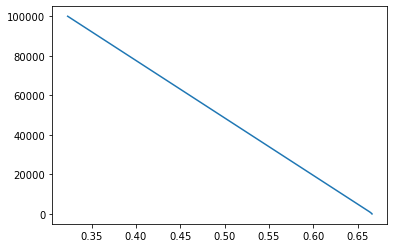

In [78]:
alfa_parametri = [0.1, 0.3, 0.5, 1, 2, 10, 100, 1000, 100000]
alfa_rezultati = []
for alfa in alfa_parametri:
    maks_rez, dobitne_kolone = ispitivanje_parametara(model = linear_model.Ridge(alpha = alfa))
    alfa_rezultati.append(maks_rez)

plt.plot(alfa_rezultati, alfa_parametri)

Obradjuje se:  2
Trenutni najbolji rezultat: 0.05478559021957752
Trenutni najbolji izbor kolona ['stanje', 'marka']
Trenutni najbolji rezultat: 0.3113065489584065
Trenutni najbolji izbor kolona ['stanje', 'godiste']
Trenutni najbolji rezultat: 0.4596496338037789
Trenutni najbolji izbor kolona ['stanje', 'snaga_motora']
Trenutni najbolji rezultat: 0.4624317823541537
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5742842992579144
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5797398327009673
Trenutni najbolji izbor kolona ['kilometraza', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5836892433604468
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5840575437846444
Trenutni najbolji izbor kolona ['stanje', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6346268499828525
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'sn

Trenutni najbolji rezultat: 0.6545445510457509
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6552917223083276
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  10
Trenutni najbolji rezultat: 0.655318167583825
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6553208089258833
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'boja', 'klima']
Trenutni najbolji rezultat: 0.655438017555916
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'snaga_motora', 'menjac', 'ostecenje', 'klima']
Obradjuje se:  11
Trenutni najbolji rezultat

Obradjuje se:  4
Trenutni najbolji rezultat: 0.5902664992908325
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.5903489843805204
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.5923442015024782
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'kubikaza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6087455936113952
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  5
Trenutni najbolji rezultat: 0.6115185419448332
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  6
Trenutni najbolji rezultat: 0.6133449996579685
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.6139496778642206
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'kubikaza', 'snaga

Trenutni najbolji rezultat: 0.30748113484647954
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'boja']
Trenutni najbolji rezultat: 0.3120408481359299
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  8
Trenutni najbolji rezultat: 0.3127157590043196
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.3137502070138688
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.3140602467326671
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'boja', 'klima']
Obradjuje se:  9
Trenutni najbolji rezultat: 0.3146625834591058
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza

Trenutni najbolji rezultat: 0.05038625091687288
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'klima']
Trenutni najbolji rezultat: 0.05053751624925629
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'klima']
Trenutni najbolji rezultat: 0.05054300475864715
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'klima']
Obradjuje se:  11
Trenutni najbolji rezultat: 0.05065843002081849
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'klima']
Trenutni najbolji rezultat: 0.05072297742560594
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_

Trenutni najbolji rezultat: 0.00495946426367655
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'klima']
Obradjuje se:  13
Trenutni najbolji rezultat: 0.004975873027703304
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'klima']
Obradjuje se:  14
Trenutni najbolji rezultat: 0.004980766007888104
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima']
Obradjuje se:  15
Trenutni najbolji rezultat: 0.004984592772237173
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac', 'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']
Najbolji re

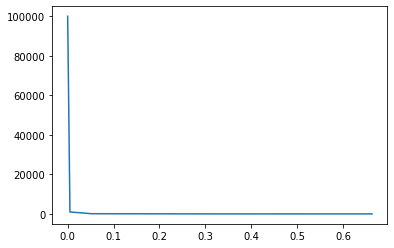

In [79]:
alfa_parametri = [0.1, 0.3, 0.5, 1, 2, 10, 100, 1000, 100000]
alfa_rezultati = []
for alfa in alfa_parametri:
    maks_rez, dobitne_kolone = ispitivanje_parametara(model = linear_model.ElasticNet(alpha = alfa))
    alfa_rezultati.append(maks_rez)

plt.plot(alfa_rezultati, alfa_parametri)

Obradjuje se:  2
Trenutni najbolji rezultat: 0.05490232705678766
Trenutni najbolji izbor kolona ['stanje', 'marka']
Trenutni najbolji rezultat: 0.3120387011373492
Trenutni najbolji izbor kolona ['stanje', 'godiste']
Trenutni najbolji rezultat: 0.4608436147839965
Trenutni najbolji izbor kolona ['stanje', 'snaga_motora']
Trenutni najbolji rezultat: 0.46371261901874017
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5753009217555445
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.5811436183876366
Trenutni najbolji izbor kolona ['kilometraza', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5846591892268493
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.585401556915077
Trenutni najbolji izbor kolona ['stanje', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6356626730942583
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'sn

Trenutni najbolji rezultat: 0.6377405954685682
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.6503334311168709
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac']
Obradjuje se:  5
Trenutni najbolji rezultat: 0.6521079002069312
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.6521705932437348
Trenutni najbolji izbor kolona ['model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac']
Trenutni najbolji rezultat: 0.6574217322968582
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  6
Trenutni najbolji rezultat: 0.6593050652100105
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6598794327636494
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'me

Trenutni najbolji rezultat: 0.6593496111341632
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.66070753360685
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  8
Trenutni najbolji rezultat: 0.6616463993581042
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.662170560383791
Trenutni najbolji izbor kolona ['stanje', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Obradjuje se:  9
Trenutni najbolji rezultat: 0.6624547278291251
Trenutni najbolji izbor kolona ['stanje', 'marka', 'model', 'godiste', 'kilometraza', 'gorivo', 'snaga_motora', 'menjac', 'klima']
Trenutni najbolji rezultat: 0.6625449102398359
Trenutni najbolji izbor kolona ['stanje', 'marka', 'godiste', 'kilometraza', 'karoserij

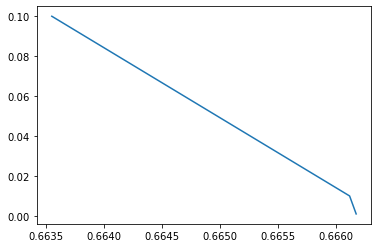

In [80]:
alfa_parametri = [0.001, 0.01, 0.1]
alfa_rezultati = []
for alfa in alfa_parametri:
    maks_rez, dobitne_kolone = ispitivanje_parametara(model = linear_model.ElasticNet(alpha = alfa))
    alfa_rezultati.append(maks_rez)

plt.plot(alfa_rezultati, alfa_parametri)

In [67]:
ulazniPodaci = ['stanje', 'marka', 'model', 'godiste', 'kilometraza',
       'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac',
       'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']+

maksRez = -1;
brojKolona = len(ulazniPodaci)
dobitneKolone = []
brojKolona = len(ulazniPodaci)

for i in range(2, brojKolona + 1):
    print('Obradjuje se: ', i)
    kombinacije = list(combinations(ulazniPodaci, i))
    for kolone in kombinacije:
        rez = lrModel(listaKolona = list(kolone), lr = linear_model.ElasticNet())
        if(rez > maksRez):
            print('Trenutni najbolji rezultat:', rez)
            print('Trenutni najbolji izbor kolona', list(kolone))
            maksRez = rez
            dobitneKolone = kolone
            
print('Najbolji rezultat: ', maksRez)
print('Kolone: ', dobitneKolone)

Obradjuje se:  2
Trenutni najbolji rezultat: 0.04877999954000445
Trenutni najbolji izbor kolona ['stanje', 'marka']
Trenutni najbolji rezultat: 0.28018930071998294
Trenutni najbolji izbor kolona ['stanje', 'godiste']
Trenutni najbolji rezultat: 0.40983544377112313
Trenutni najbolji izbor kolona ['stanje', 'snaga_motora']
Trenutni najbolji rezultat: 0.40997639403690267
Trenutni najbolji izbor kolona ['godiste', 'kubikaza']
Trenutni najbolji rezultat: 0.5281459533452909
Trenutni najbolji izbor kolona ['godiste', 'snaga_motora']
Obradjuje se:  3
Trenutni najbolji rezultat: 0.5387693009020063
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'snaga_motora']
Trenutni najbolji rezultat: 0.588004013079509
Trenutni najbolji izbor kolona ['godiste', 'kilometraza', 'snaga_motora']
Obradjuje se:  4
Trenutni najbolji rezultat: 0.5902664992908325
Trenutni najbolji izbor kolona ['stanje', 'godiste', 'kilometraza', 'snaga_motora']
Trenutni najbolji rezultat: 0.5903489843805204
Trenutni najbolji iz

In [40]:
def knnModel(listaKolona, brojSuseda = 10, racunanjeDistance = 2):
    X = podaci[listaKolona] # probamo razlicite kombinacije ulaznih odlika
    y = podaci['opseg_cena']
    X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    ss = StandardScaler()
    X_skalirano = ss.fit_transform(X)
    X_trening_skalirano = ss.fit_transform(X_trening)
    X_test_skalirano = ss.fit_transform(X_test)

    knn = KNeighborsClassifier(n_neighbors = brojSuseda, weights = 'distance', p = racunanjeDistance)
    knn.fit(X_trening_skalirano, y_trening)

    y_pred = knn.predict(X_test_skalirano)
        
    preciznost = metrics.accuracy_score(y_test, y_pred)
    f_mera = f1_score(y_test, y_pred, average = 'weighted')
    print("Preciznost:", preciznost)
    print("F mera:", f_mera)

    cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
    disp.plot()
    
    return knn
    # return knn, X_trening_skalirano, X_test_skalirano, y_trening, y_test, y_pred, preciznost, f_mera

In [63]:
ulazniPodaci = ['stanje', 'marka', 'model', 'godiste', 'kilometraza',
       'karoserija', 'gorivo', 'kubikaza', 'snaga_motora', 'menjac',
       'broj_vrata', 'boja', 'ostecenje', 'klima', 'lokacija']

maksRez = -1;
brojKolona = len(ulazniPodaci)

for i in range(2, 15):
    print('Obradjuje se: ', i)
    kombinacije = list(combinations(ulazniPodaci, i))
    for kolone in kombinacije:
        rez = knnModel(list(kolone))
        if(rez > maksRez):
            maksRez = rez
            dobitneKolone = kolone
            
print('Najbolji rezultat: ', maksRez)
print('Kolone: ', dobitneKolone)

Obradjuje se:  2
Obradjuje se:  3
Obradjuje se:  4
Obradjuje se:  5
Obradjuje se:  6
Obradjuje se:  7
Obradjuje se:  8
Obradjuje se:  9
Obradjuje se:  10
Obradjuje se:  11
Obradjuje se:  12
Obradjuje se:  13
Obradjuje se:  14
Najbolji rezultat:  0.7734966592427617
Kolone:  ('marka', 'model', 'godiste', 'karoserija', 'snaga_motora', 'broj_vrata', 'ostecenje')


In [69]:
def ispisiMaksIndeks(rezultati):
    maks = max(rezultati)
    maks_indeks = rezultati.index(maks)
    print('Maksimalni rezultat:', maks)
    print('Indeks maksimalnog rezultata:', maks_indeks)

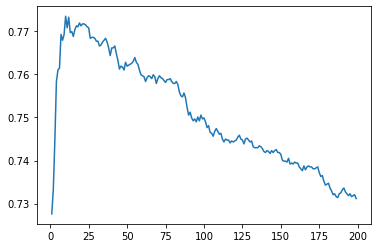

In [64]:
ulazniPodaci = ['marka', 'model', 'godiste', 'karoserija', 'snaga_motora', 'broj_vrata', 'ostecenje']

rezultati = []

for i in range(1, 200):
    rezultati.append(knnModel(listaKolona = ulazniPodaci, brojSuseda = i))

plt.plot(list(range(1, 200)), rezultati)

In [85]:
ispisiMaksIndeks(rezultati)

Maksimalni rezultat: 0.7734966592427617
Indeks maksimalnog rezultata: 9


Preciznost: 0.7710467706013363
F mera: 0.7672843904074128


KNeighborsClassifier(n_neighbors=10, weights='distance')

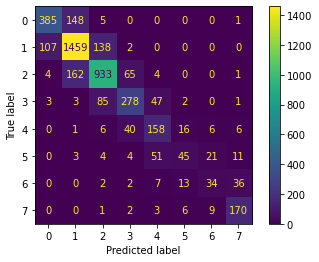

In [42]:
ulazniPodaci = ['marka', 'model', 'godiste', 'karoserija', 'snaga_motora', 'broj_vrata', 'ostecenje']
knnModel(listaKolona = ulazniPodaci, brojSuseda = 10, racunanjeDistance = 2)

Preciznost: 0.7734966592427617
F mera: 0.7693740565024889


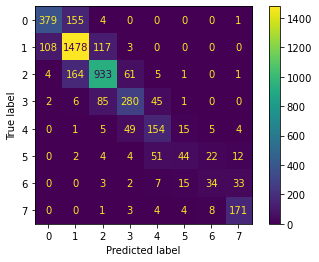

In [122]:
ulazniPodaci = ['marka', 'model', 'godiste', 'karoserija', 'snaga_motora', 'broj_vrata', 'ostecenje']
knn, X_trening_skalirano, X_test_skalirano, y_trening, y_test, y_pred, preciznost, f_mera = knnModel(listaKolona = ulazniPodaci, brojSuseda = 10, racunanjeDistance = 1)